<a href="https://colab.research.google.com/github/felipe24I/Entregas/blob/main/practica_se%C3%B1ales_estandar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

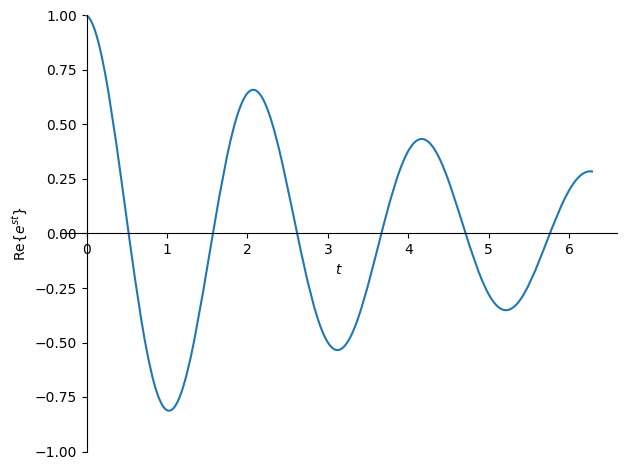

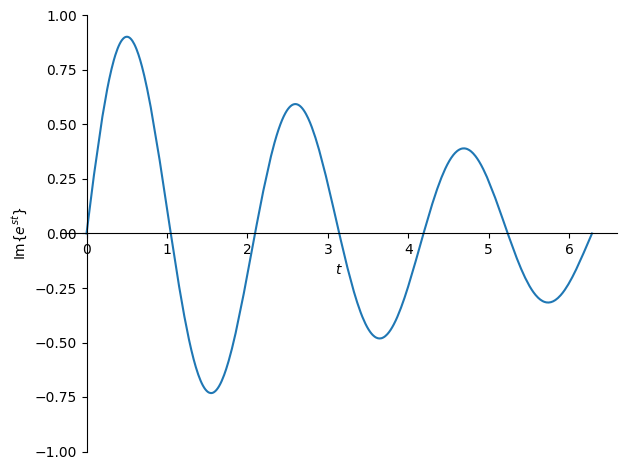

In [6]:
#amplitud decreciente
%matplotlib inline
#para graficar en el entorno
import sympy as sym #importo libreria sympy
t, sigma, omega= sym.symbols("t sigma omega",real=True) #defino las variables simbolicas
s=sigma+1j*omega #sobre cargo el operador para definir parte imaginaria
x=sym.exp(s*t) #defino funcion exponencial compleja
x #muestro funcion exponencial compleja

y=x.subs({omega:3,sigma:-0.2})
sym.plot(sym.re(y),(t,0,2*sym.pi),ylim=[-1,1,],ylabel=r"Re{$e^{st}$}")
sym.plot(sym.im(y),(t,0,2*sym.pi),ylim=[-1,1],ylabel=r"Im{$e^{st}$}")

In [15]:
import sympy as sym
t,tau= sym.symbols("t tau",real=True)
delta=sym.DiracDelta(t-tau)

x=sym.Function('x')(t)
sym.integrate(delta*x,(t,-sym.oo,sym.oo))

x(tau)

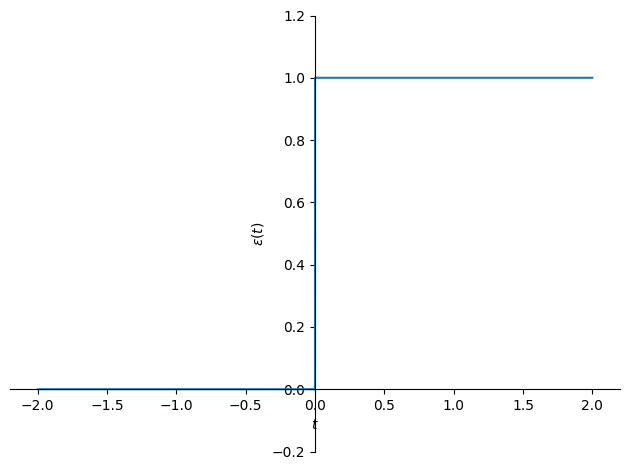

In [20]:
import sympy as sym
t=sym.symbols("t",real=True)
step=sym.Heaviside(t)
step

sym.plot(step,(t,-2,2),ylim=[-0.2,1.2],ylabel=r"$\epsilon(t)$")

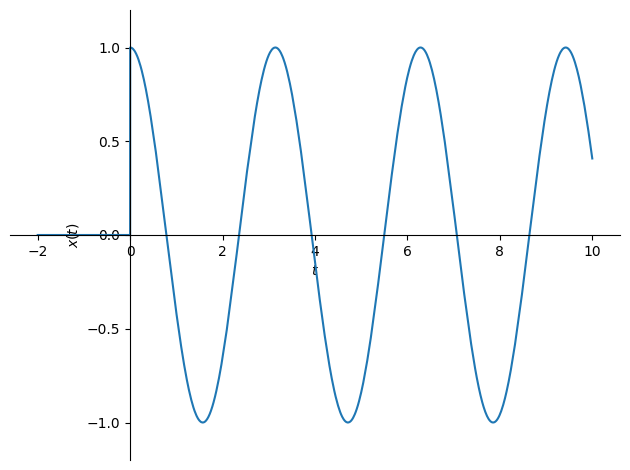

In [25]:
import sympy as sym
t,omega=sym.symbols("t omega",real=True)
step=sym.Heaviside(t)
x=sym.cos(omega*t)*step

sym.plot(x.subs(omega,2),(t,-2,10),ylim=[-1.2,1.2],ylabel=r'$x(t)$')

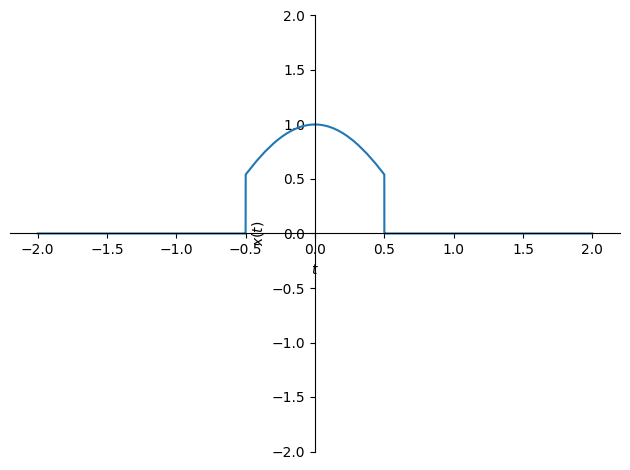

In [34]:
import sympy as sym
t,omega=sym.symbols("t omega",real=True)
class rect(sym.Function):
  @classmethod
  def eval (cls,arg):
    return sym.Heaviside(arg+sym.S.Half)-sym.Heaviside(arg-sym.S.Half)
x=sym.cos(omega*t)*rect(t)
sym.plot(x.subs(omega,2),(t,-2,2),ylim=[-2,2],ylabel=r"$x(t)$")

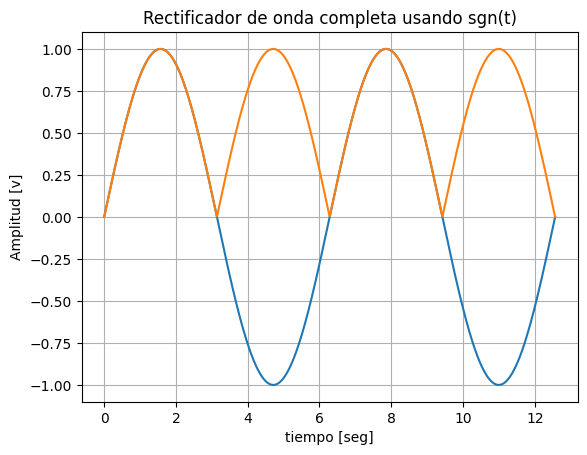

In [45]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

t=sym.symbols("t",real=True)
sgn=sym.sign(t)

señal_entrada=sym.sin(t)
señal_rectificada=np.abs(señal_entrada*sgn)

señal_entrada_np=sym.lambdify(t,señal_entrada,"numpy")
señal_rectificada_np=sym.lambdify(t,señal_rectificada,"numpy")

tv=np.linspace(0,4*np.pi,1000)

señal_entrada_valores=señal_entrada_np(tv)
señal_rectificada_valores=señal_rectificada_np(tv)

plt.plot(tv,señal_entrada_valores)
plt.plot(tv,señal_rectificada_valores)
plt.title("Rectificador de onda completa usando sgn(t)")
plt.xlabel("tiempo [seg]")
plt.ylabel("Amplitud [v]")
plt.grid(True)
plt.show()